In [1]:
import pandas as pd
import quandl
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [2]:
# df = pd.read_csv('da.csv')
df = quandl.get('WIKI/GOOGL')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3424 entries, 2004-08-19 to 2018-03-27
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         3424 non-null   float64
 1   High         3424 non-null   float64
 2   Low          3424 non-null   float64
 3   Close        3424 non-null   float64
 4   Volume       3424 non-null   float64
 5   Ex-Dividend  3424 non-null   float64
 6   Split Ratio  3424 non-null   float64
 7   Adj. Open    3424 non-null   float64
 8   Adj. High    3424 non-null   float64
 9   Adj. Low     3424 non-null   float64
 10  Adj. Close   3424 non-null   float64
 11  Adj. Volume  3424 non-null   float64
dtypes: float64(12)
memory usage: 347.8 KB


In [3]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df.head(5)

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [4]:
#percent violitity i don't know what I am spelling again
df['HL_PCT'] =  (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_change'] =  (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [5]:
df =  df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3424 entries, 2004-08-19 to 2018-03-27
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Adj. Close   3424 non-null   float64
 1   HL_PCT       3424 non-null   float64
 2   PCT_change   3424 non-null   float64
 3   Adj. Volume  3424 non-null   float64
dtypes: float64(4)
memory usage: 133.8 KB


In [6]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

In [7]:
import math
forecast_out =  int(math.ceil(0.01*len(df)))

In [8]:
df['label'] =  df[forecast_col].shift(-forecast_out)

In [9]:
X = np.array(df.drop(['label'], 1))

C:\Users\nwukw\AppData\Local\Temp\ipykernel_16780\2899627998.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


In [10]:
X =  preprocessing.scale(X)
X_lately = X[-forecast_out:]
X =  X[:-forecast_out]

In [11]:
# X = X[:-forecast_out+1]
df.dropna(inplace=True)
y = np.array(df['label'])

In [12]:
print(len(X), len(y))

3389 3389


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2)

In [14]:
clf  =  LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

In [15]:
#forecasting
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[1103.37627148 1070.78816833 1016.74206751 1060.9406313  1072.32155194
 1072.82172028 1091.96767848 1110.81107527 1113.77520391 1122.12240504
 1131.14551414 1128.15768309 1148.27187261 1163.9829283  1134.28237813
 1120.7964265  1085.86107242 1103.38772681 1114.01510424 1120.3875744
 1135.04982401 1149.36687603 1181.15229057 1184.89028662 1155.67829944
 1167.87608878 1169.63825408 1151.67950599 1117.16839912 1114.13020793
 1112.03940508 1068.24746026 1040.56884729 1072.38582798 1018.22118923] 0.9811207286136834 35


In [16]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

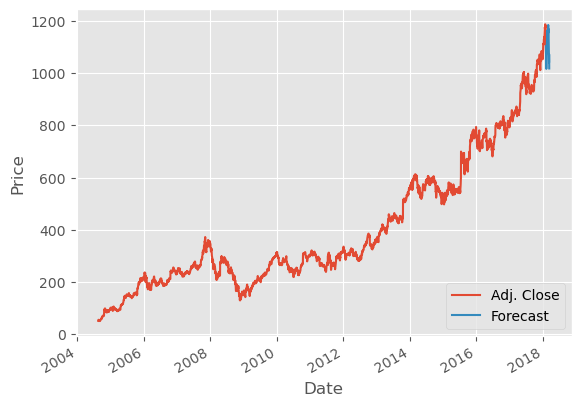

In [17]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix =  last_date.timestamp()
one_day = 86400
next_unix =  last_unix + one_day
last_date
for i in forecast_set:
    next_date =  datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] =  [np.nan for _ in range(len(df.columns)-1)] + [i]
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [18]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.078238,NaN
2004-08-20,54.322689,0.710922,7.227007,22834300.0,67.839414,NaN
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,68.912727,NaN
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,70.668146,NaN
2004-08-25,53.164113,1.886792,1.183658,9188600.0,71.219849,NaN
